In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def plot_global(qtable):

    heatmap_data = np.mean(qtable, axis=0)  # Shape: (35, 30)
    vmin = np.min(heatmap_data)  # Valeur minimale de la Q-table
    vmax = np.max(heatmap_data)
    # Afficher la heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=False, cmap="seismic_r", cbar=True, vmin=vmin, vmax=vmax, center = 0)
    plt.title("Heatmap des valeurs Q (max sur les actions)")
    plt.xlabel("Position Y")
    plt.ylabel("Position X")
    plt.show()

In [3]:
def plot_distinct(qtable):
    """
    Affiche les heatmaps des valeurs Q pour chaque action dans des sous-graphiques.
    Assure une cohérence des couleurs sur toutes les heatmaps.
    """
    # Configuration des sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 pour 4 actions
    actions = ["UP (3)", "DOWN (2)", "RIGHT (1)", "LEFT (0)"]

    # Déterminer les limites globales de la palette
    vmin = np.min(qtable)  # Valeur minimale de la Q-table
    vmax = np.max(qtable)  # Valeur maximale de la Q-table

    for i, ax in enumerate(axes.flat):
        # Extraire les valeurs Q pour l'action i
        heatmap_data = qtable[i, :, :]  # Shape (35, 30)
        
        # Tracer la heatmap
        sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap="seismic_r",
            cbar=True,
            annot=False,
            xticklabels=False,
            yticklabels=False,
            vmin=vmin,  # Fixer les mêmes limites pour toutes les heatmaps
            vmax=vmax,
            center = 0
        )
        ax.set_title(f"Action : {actions[i]}")
        ax.set_xlabel("Position Y")
        ax.set_ylabel("Position X")

    # Espacement entre les subplots
    plt.tight_layout()
    plt.suptitle("Heatmaps des valeurs Q pour chaque action", fontsize=16, y=1.02)
    plt.show()

In [4]:
def plot_combined(qtable):
    """
    Affiche une heatmap des valeurs Q moyennes superposée avec le champ de vecteurs
    indiquant l'action la plus probable pour chaque case, sans inversion de l'axe Y.
    """
    # Calcul de la heatmap (valeurs moyennes des actions)
    heatmap_data = np.mean(qtable, axis=0)  # Moyenne sur les actions
    vmin = np.min(heatmap_data)
    vmax = np.max(heatmap_data)

    # Calcul des vecteurs (action la plus probable)
    action_max = np.argmax(qtable, axis=0)  # Action la plus probable pour chaque case
    action_vectors = {
        0: (-1, 0),  # LEFT
        1: (1, 0),   # RIGHT
        2: (0, 1),   # DOWN
        3: (0, -1),  # UP
    }

    # Initialiser les matrices pour les composantes des vecteurs
    U = np.zeros_like(action_max, dtype=float)  # Composante X des vecteurs
    V = np.zeros_like(action_max, dtype=float)  # Composante Y des vecteurs

    # Remplir U et V en fonction des actions les plus probables
    for action, (dx, dy) in action_vectors.items():
        U[action_max == action] = dx
        V[action_max == action] = dy

    # Créer une grille pour positionner les vecteurs
    X, Y = np.meshgrid(np.arange(action_max.shape[1]), np.arange(action_max.shape[0]))

    # Création de la figure
    plt.figure(figsize=(12, 8))

    # Tracer la heatmap
    sns.heatmap(
        heatmap_data,
        cmap="seismic_r",  # Palette inversée (bleu -> rouge)
        cbar=True,
        annot=False,
        vmin=vmin,
        vmax=vmax,
        center=0
    )

    # Superposer les vecteurs
    plt.quiver(
        X + 0.5, Y + 0.5,  # Centrer les vecteurs dans chaque cellule
        V, U,              # U et V pour les directions
        angles='xy',
        scale_units='xy',
        scale=1,
        color="black"
    )

    # Configuration des axes
    plt.title("Heatmap des valeurs Q avec vecteurs des actions les plus probables")
    plt.xlabel("Position X")
    plt.ylabel("Position Y")
    plt.show()

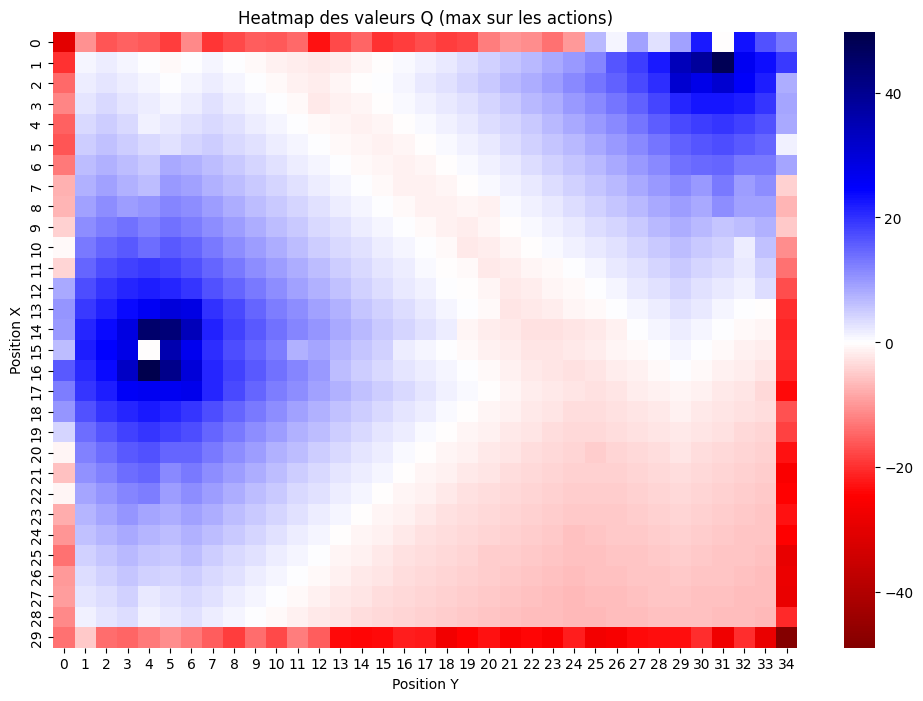

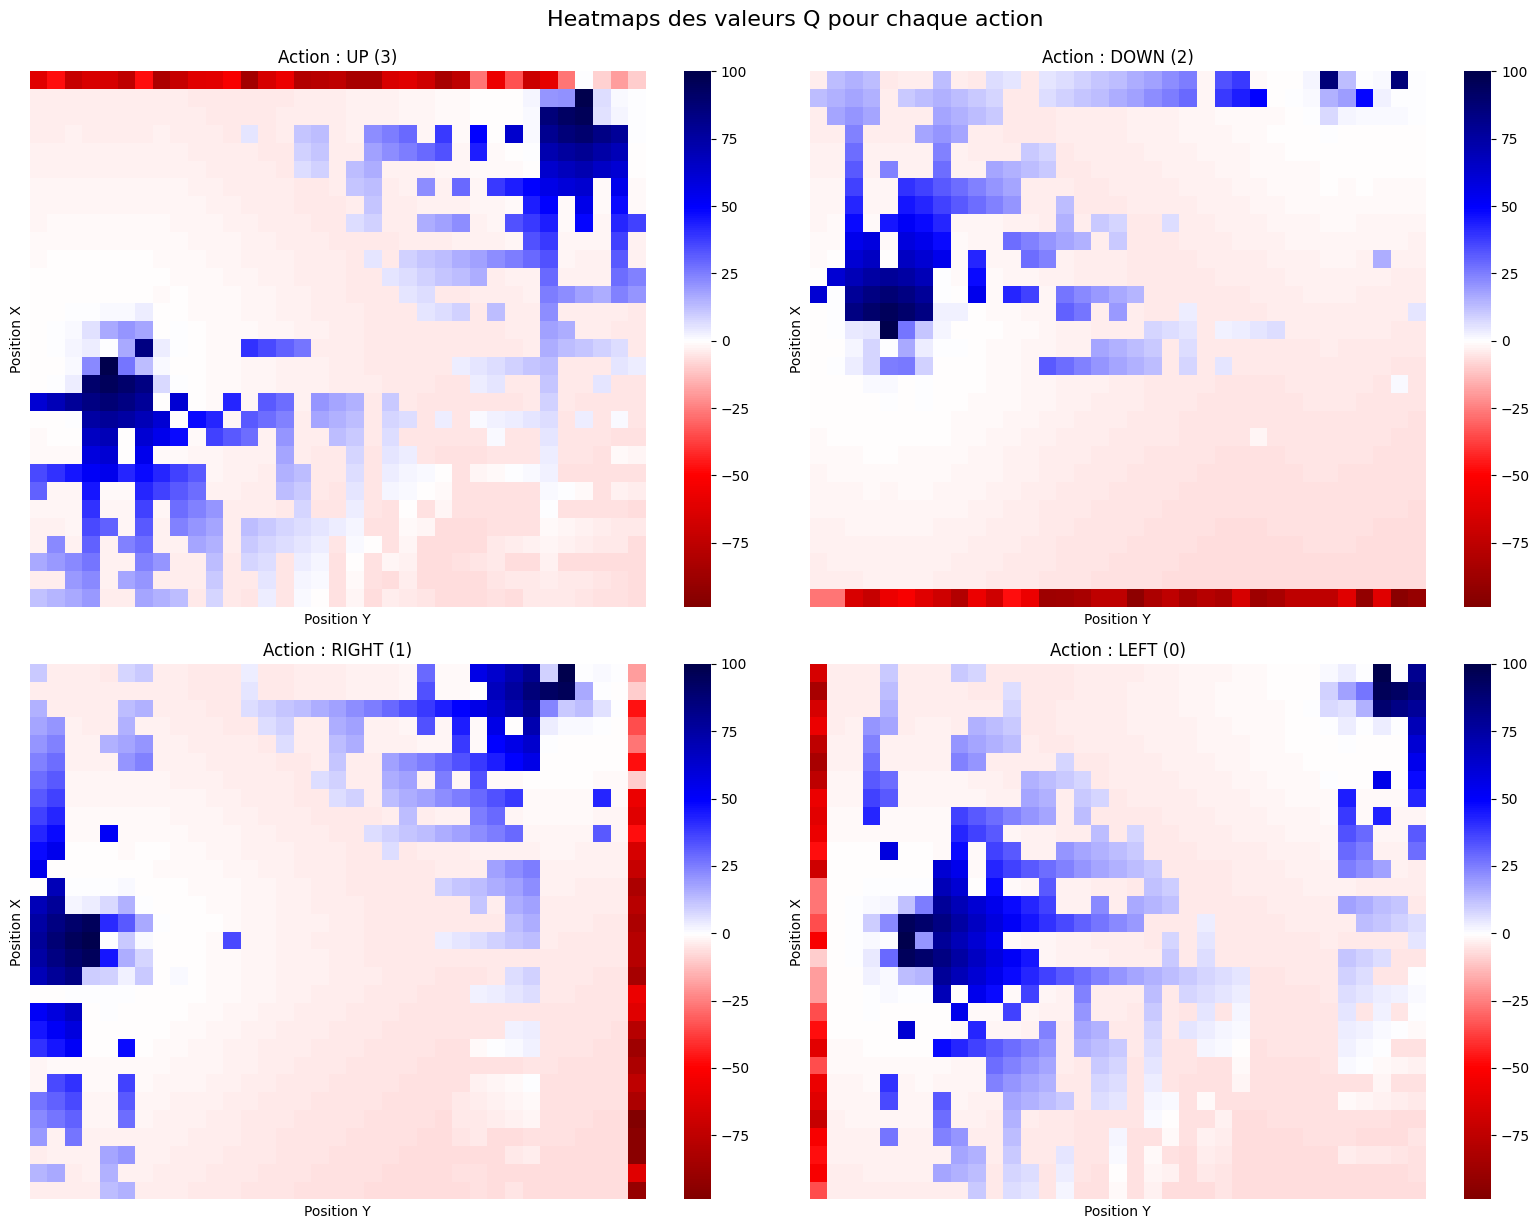

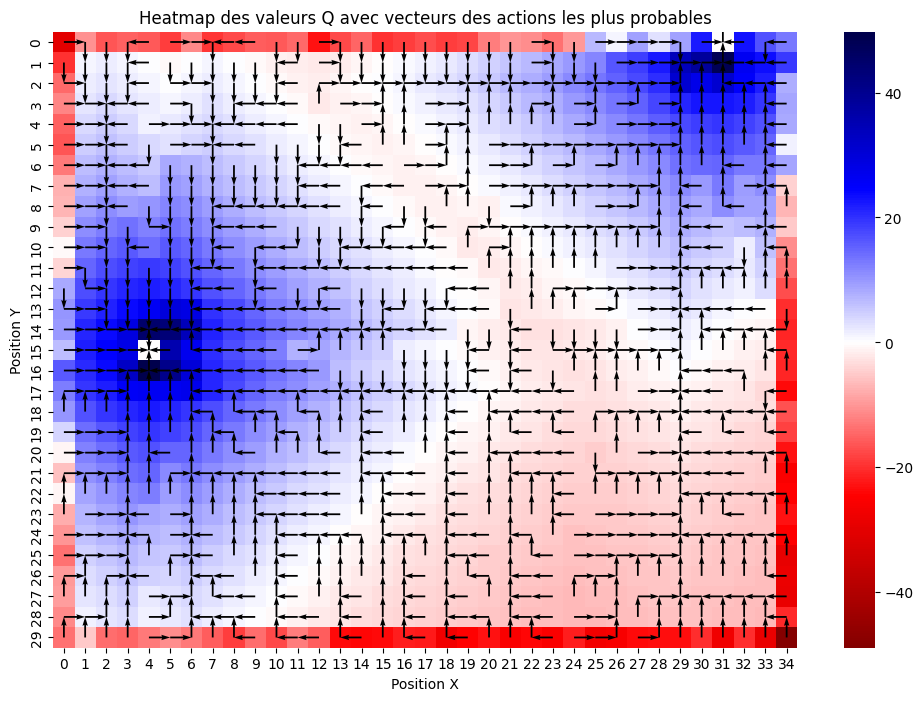

In [5]:
qtable = np.load("results/Qlearning_TraditionalRandom/Random_100000.npy")

plot_global(qtable)
plot_distinct(qtable)
plot_combined(qtable)